# An Analysis of Paleo to present Climate Change Data

<details>

<summary> Student Details </summary>

| Student| Details |
| -------- | -------- |
| Course: | KDATG_L08_Y1 |
| Author: | Rebecca Hannah Quinn |
| Student Number: | G00425671 |

</details>

---

## Project Goals

To Analyse CO2 vs Temperature Anomaly for the past 800,000 years to the present day.
To examine the change in the polar-ice coverage alongside this.
To examine the changes in Ireland and Irish climate change signals.

In gathering this information and data I will fuse and analyse the data using pandas dataframes and export the results to csv and json formats.

I will be anaylising the data, the trends, the relationships between them including but not limited to: temporal leads, lags, and frequencies. I will also use synthesised data to predict global temperature anomoly over the next few decades and compare to published models of the same to see if atmospherice CO2 trends continue and comment on the accelerated warming based on the latest features with temperatures polar-ice coverage and ocean and sea levels.




<details>

<summary> Table of Contents </summary>

[INTRODUCTION](#01)

[PRE-PROCESSING](#02)

[ANALYSIS](#03)

[PREDICITONS](#04)

[FURTHER COMMENT](#05)

[PLOTS](#06)

</details>

---


## Introduction


There have been studies on the Earth"s climate that have resulted in data as far back as 800,000 years by extracting core samples from deep beneath the ice sheets of Greenland and Antarctica. These samples contain detailed information on air temperature and CO2 levels that are trapped within them. Current polar records demonstrate a close association between atmospheric carbon dioxide and temperature in the natural world. In essence, when one increases, the other one follows.

However, there is still some uncertainty about which occurred first - a spike in temperature or CO2. Until now, the most extensive records to date on a significant change in Earth"s climate came from the EPICA Dome C ice core on the Antarctic Plateau. The data, which covered the end of the last ice age, between 20,000 and 10,000 years ago, indicated that CO2 levels could have lagged behind rising global temperatures by as much as 1,400 years.
[1]: https://www.scientificamerican.com/article/ice-core-data-help-solve/#:~:text=Scientists%20use%20air%20trapped%20in,than%20the%20ice%20surrounding%20them.


<a id="01i">

## Pre-processing

</a>





### Import Packages

In [245]:
#importing packages required for analysis and visualization
import requests
from io import StringIO
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Initial Adjustments

#### C02 Levels Data

##### Data Collection and Reading in the Data

The first database used `epica8kyr1`  is an updated version of the atmospheric CO2 composite data obtained from the revised EPICA Dome C and Antarctic ice cores. The previous version of Luthi et al. (2008) contained analytical bias and lower quality data, which has been improved in this new version. The age unit is in years before present (yr BP), where present refers to 1950 AD. This has been changed later from negetive integers to the actual year, starting with year 0, in order to merge and clear the data up for use in later plots.

In [246]:
epica1col = ["year", "co2", "sigma"]
epica8kyr1 = pd.read_excel("https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2.xls", sheet_name="CO2 Composite", skiprows=59, names=epica1col)

epica8kyr1["year"] = epica8kyr1["year"].astype(int)
epica8kyr1["year"] = -1 * epica8kyr1["year"] + 1950

epica8kyr1.to_csv("epica8kyr1.csv", index=False)

In [247]:
epica2col = ["year", "co2", "unc"]
epica8kyr2 = pd.read_csv("https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.csv", skiprows=44, sep=",", names=epica2col)

epica8kyr2.to_csv("epica8kyr2.csv")

##### Cleanup of Data

Here we take the "year" column in the second dataset and convert the data to actual dates (stored in a new column titled "date") and put in order and make clearer so when we merge the datasets we can do so seamlessly.

In [248]:
epica8kyr2.reset_index(drop=True, inplace=True)
epica8kyr2["year"] = epica8kyr2["year"].astype(str)
epica8kyr2.to_csv("epica8kyr2new.csv")

##### Merging Data

###### Merging both C02 datasets for plotting

In [249]:
epica8kyr2['year'] = epica8kyr2['year'].astype(int)
mergeepica1 = pd.merge(epica8kyr1, epica8kyr2, on="year", how="outer", suffixes=("epica8kyr1", "epica8kyr2"))

mergeepica1.to_csv("epica_merge1.csv", index = True)
###

In [250]:
print(mergeepica1.head())
print(mergeepica1.describe())
print(mergeepica1.info())
print(mergeepica1.corr())
###https://www.geeksforgeeks.org/python-pandas-dataframe-corr/

   year  co2epica8kyr1     sigma  co2epica8kyr2   unc
0  1960     318.206580  1.723064         316.91  0.12
1  1960     313.093388  1.812521         316.91  0.12
2  1959     311.983892  1.812519         315.98  0.12
3  1958     316.334020  0.941400            NaN   NaN
4  1958     316.101403  1.723061            NaN   NaN
                year  co2epica8kyr1        sigma  co2epica8kyr2           unc
count    1919.000000    1856.000000  1856.000000      66.000000  6.600000e+01
mean  -238581.520584     233.165723     1.358964     358.618333  1.200000e-01
std    273973.965015      32.736293     0.924446      31.517191  9.788893e-17
min   -803718.000000     173.713620     0.010000     315.980000  1.200000e-01
25%   -498743.500000     204.441665     0.666737     330.425000  1.200000e-01
50%    -68978.000000     231.416486     1.098790     355.075000  1.200000e-01
75%    -12442.000000     254.302544     1.804685     383.537500  1.200000e-01
max      2023.000000     318.206580     9.960000    

#### Calculating Statistical Measures


In [251]:
mean_value = mergeepica1["co2"].mean()
print(mean_value)

median_value = mergeepica1["co2"].median()
print(median_value)

std_deviation = mergeepica1["co2"].std()
print(std_deviation)

correlation = mergeepica1["co2"].corr(mergeepica1["year"])
print(correlation)


KeyError: 'co2'


#### Initial Visualization


TypeError: 'value' must be an instance of str or bytes, not a float

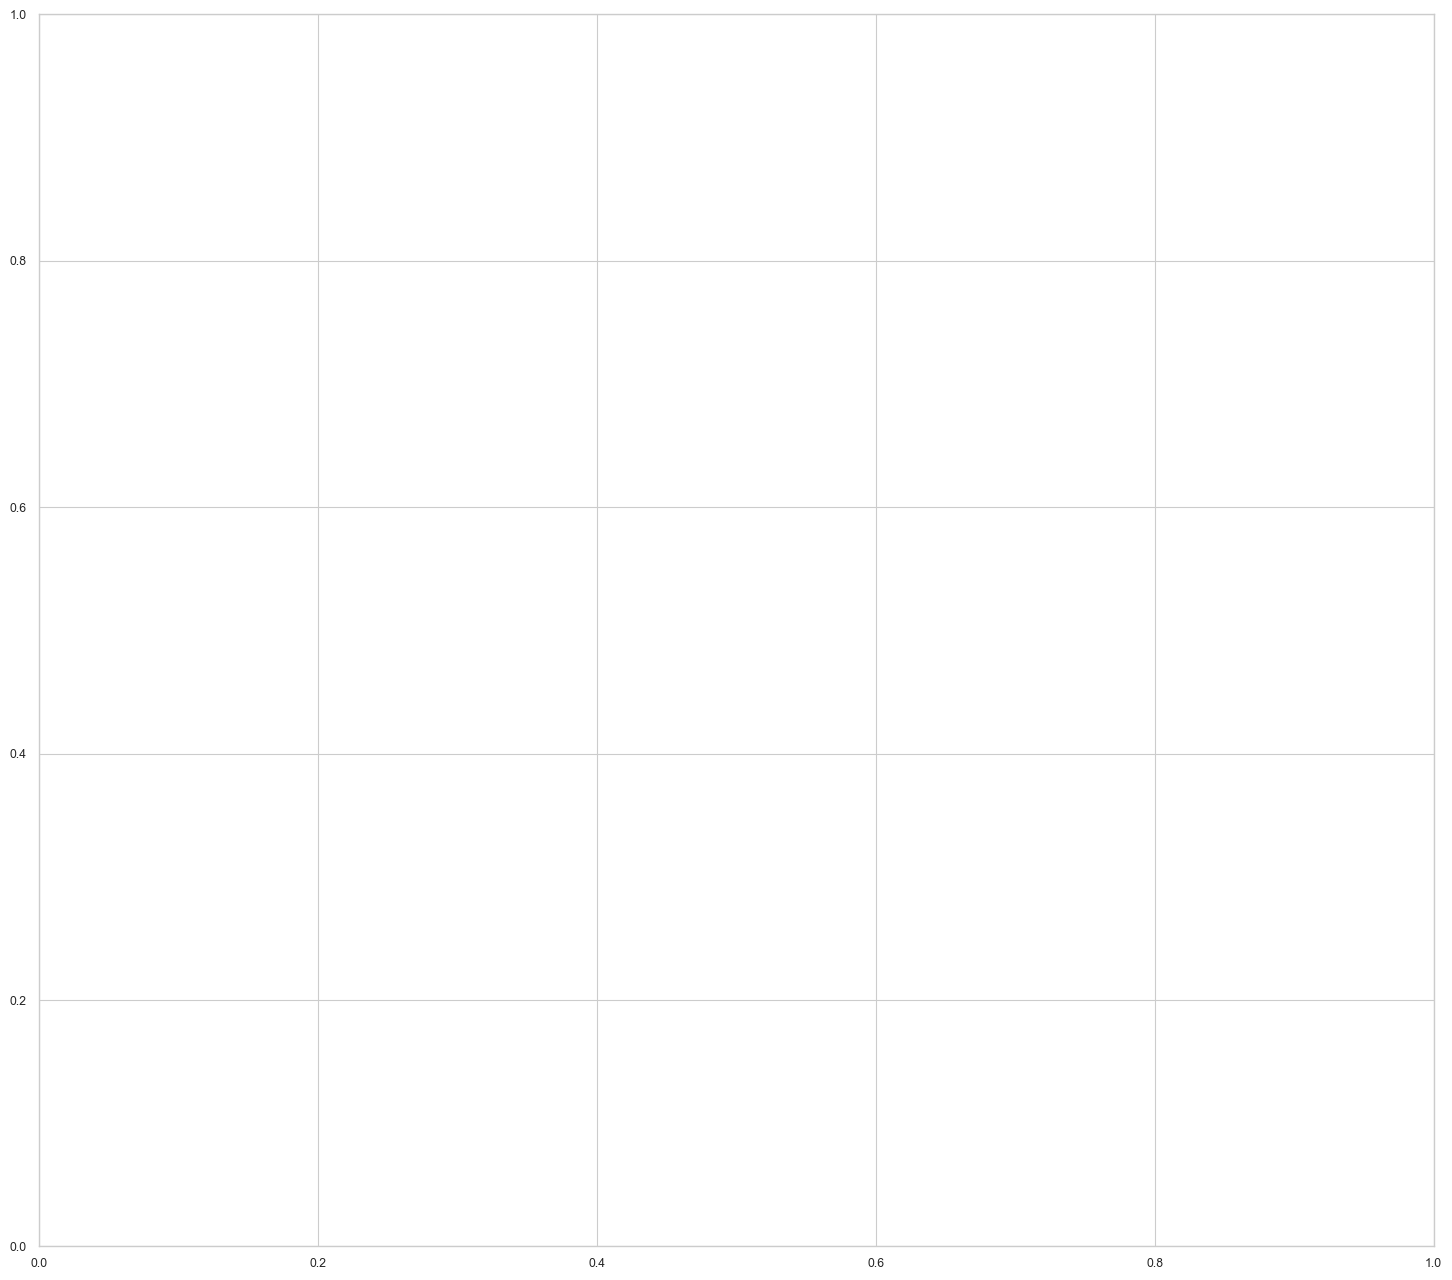

In [ ]:
#Matplotlib Line plot
plt.figure(figsize=(18, 16))
plt.plot(mergeepica1["year"], mergeepica1["co2"], color="blue")
plt.xlabel("YEAR")
plt.ylabel("CO2")
plt.xticks()
plt.yticks()
plt.title("CO2 V Time")
plt.tight_layout()
plt.savefig("lineplot1.png")

/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert 

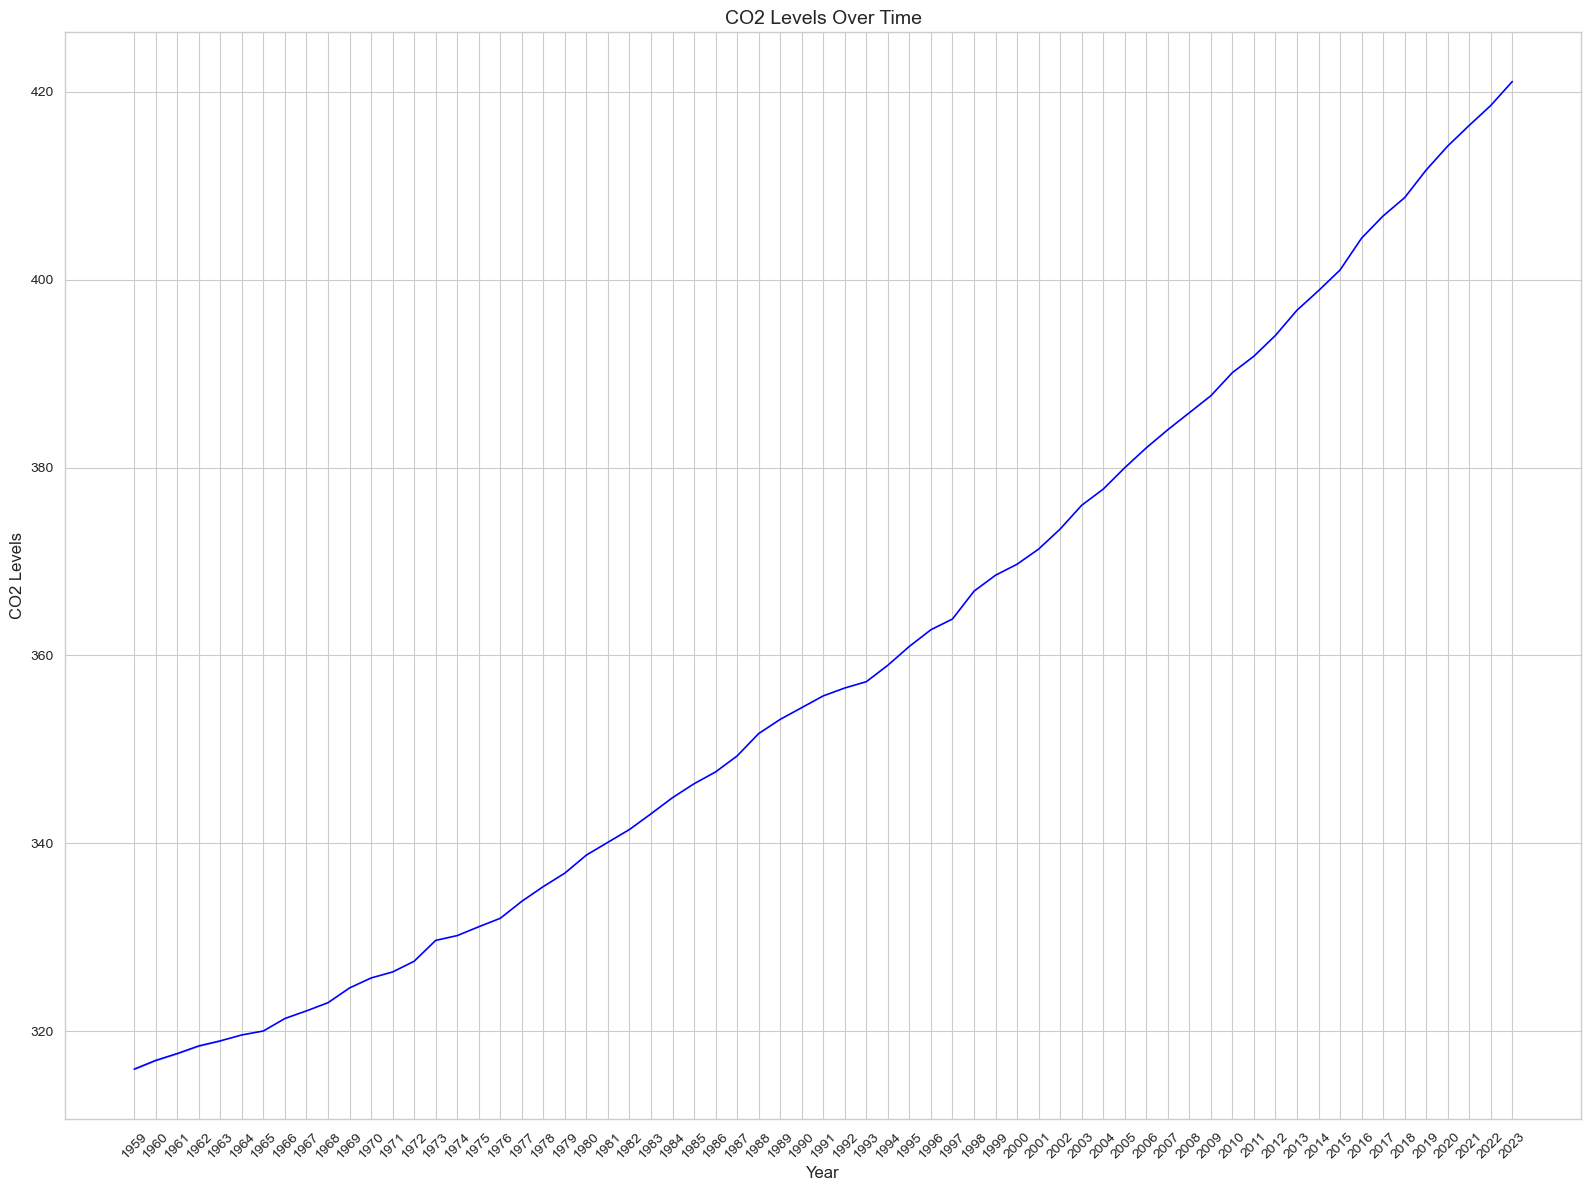

In [ ]:
#SNS Lineplot
#style
sns.set_style("whitegrid")
sns.set_context("paper")  # Adjust context to paper for smaller font sizes

#size
plt.figure(figsize=(16, 12))

#lineplot
sns.lineplot(data=mergeepica1, x="year", y="co2", color="blue")

#labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("CO2 Levels", fontsize=12)
plt.title("CO2 Levels Over Time", fontsize=14)
plt.xticks(rotation=45)

#ticks spacing
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.tight_layout()  #additional spacing
plt.savefig("snslineplotnew.png")

#### Collection of CH4

In [ ]:
ch4columns = ["Year", "Epica Dome C, Antartica"]
ch4read = pd.read_csv("https://climatechange.chicago.gov/sites/production/files/2016-08/ghg-concentrations_fig-2.csv", skiprows=range(0, 5), header=1, usecols=[0, 1], names=ch4columns)

ch4read = ch4read[ch4read['Year'].str.isnumeric()]
ch4read["Year"] = ch4read["Year"].astype(int)

def convertyear(year):
    minyear = ch4read["Year"].min()
    if year < 0:
        return year + abs(minyear)
    else:
        return year

ch4read["Year"] = ch4read["Year"].apply(convertyear)
ch4read.to_csv("ch4.csv")
ch4read.head()

,Year,"Epica Dome C, Antartica"
2058,43,613.300000
2066,399,630.437945
2079,1008,NaN
2081,1048,NaN
2085,1098,NaN


In [ ]:
ch4read.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 2058 to 2208
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     107 non-null    int64  
 1   Epica Dome C, Antartica  3 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 2.5 KB


In [ ]:
ch4read.describe()

,Year,"Epica Dome C, Antartica"
count,107.000000,3.000000
mean,1806.046729,641.530815
std,322.308108,35.116826
min,43.000000,613.300000
25%,1770.500000,621.868972
50%,1938.000000,630.437945
75%,1988.500000,655.646223
max,2015.000000,680.854500


In [ ]:
noaach4 = "https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_annmean_gl.txt"

response = requests.get(noaach4)

if response.status_code == 200:
    text = response.text
    noaach4df = pd.read_csv(StringIO(text), skiprows=44, header=0)
    noaach4df.to_csv("noaach4.csv", index="True")



---


In [ ]:
noaach4df.head()

,# year mean unc
0,1984 1644.68 0.67
1,1985 1657.29 0.59
2,1986 1670.09 0.74
3,1987 1682.71 0.49
4,1988 1693.13 0.67


In [ ]:
noaach4df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   # year     mean      unc  40 non-null     object
dtypes: object(1)
memory usage: 452.0+ bytes


In [ ]:
noaach4df.describe()

,# year mean unc
count,40
unique,40
top,1984 1644.68 0.67
freq,1



---


#### Temperatures

In [ ]:
epicadeut = "https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt"

response = requests.get(epicadeut)

if response.status_code == 200:
    text = response.text
    epicadeutdf = pd.read_csv(StringIO(text), sep='\s+', skiprows=89, header=0)

    
epicadeutdf.rename(columns={"Age": "Year"}, inplace=True)

epicadeutdf["Year"] = epicadeutdf["Year"].astype(int)
epicadeutdf["Year"] = -1 * epicadeutdf["Year"] + 1950
#epicadeutdf["Year"] = epicadeutdf["Year"].astype(str) + " BC" if (epicadeutdf["Year"] < 0).any() else epicadeutdf["Year"]


epicadeutdf.to_csv("epicadeut.csv", index="True")


In [ ]:
epicadeutdf.head(15)

,Bag,ztop,Year,Deuterium,Temperature
0,1,0.00,2000,NaN,NaN
1,2,0.55,1993,NaN,NaN
2,3,1.10,1987,NaN,NaN
3,4,1.65,1981,NaN,NaN
4,5,2.20,1974,NaN,NaN
5,6,2.75,1967,NaN,NaN
6,7,3.30,1960,NaN,NaN
7,8,3.85,1953,NaN,NaN
8,9,4.40,1945,NaN,NaN
9,10,4.95,1937,NaN,NaN


In [ ]:
epicadeutdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Bag          5800 non-null   int64  
 1   ztop         5800 non-null   float64
 2   Year         5800 non-null   int64  
 3   Deuterium    5788 non-null   float64
 4   Temperature  5785 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 226.7 KB


 EDC3 age scale (years before year 1950)
 Temperature estimate (temperature difference from the average of the last 1000 years)


---


In [ ]:
noaatemp = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/antarctic/land_ocean/12/11/1850-2023/data.csv", skiprows=range(0,4))

noaatemp.to_csv("noaatemp.csv", index="True")
noaatemp.head(10)

,Year,Anomaly
0,1851,-0.03
1,1852,-0.04
2,1853,-0.04
3,1854,-0.03
4,1855,0.05
5,1856,-0.01
6,1857,-0.07
7,1858,0.05
8,1859,-0.02
9,1860,0.01



---

#### Irish Climate Change

##### Yearly Rainfall 1711 - 2016

In [ ]:
colnames = ["Year", "Month", "Median Rainfall"]
irelandrain = pd.read_csv("DATA Files/IOI_1711_SERIES.CSV", names=colnames, header=0) 
irelandrain.info()
print(irelandrain.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             3672 non-null   int64  
 1   Month            3672 non-null   int64  
 2   Median Rainfall  3672 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 86.2 KB
Index(['Year', 'Month', 'Median Rainfall'], dtype='object')


In [ ]:
irelandrain.tail() #check final year entry

,Year,Month,Median Rainfall
3667,2016,8,79.1
3668,2016,9,108.1
3669,2016,10,51.8
3670,2016,11,58.0
3671,2016,12,92.1


In [ ]:
irelandrain.head()

irelandrain["Median Rainfall"] = irelandrain["Median Rainfall"].astype(float)
uniqueyears = irelandrain["Year"].unique()

totalbyyear = []

for year in uniqueyears:
    
    specificyear = irelandrain[irelandrain["Year"] == year]
    totalmedianyear = specificyear["Median Rainfall"].sum()
    totalbyyear.append({"Year": year, "Total Median": totalmedianyear})

raindfnew = pd.DataFrame(totalbyyear)

raindfnew.to_csv("yearlyrain.csv", index=False)


/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rebeccaquinn/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

Text(0, 0.5, 'Median Rainfall (mm)')

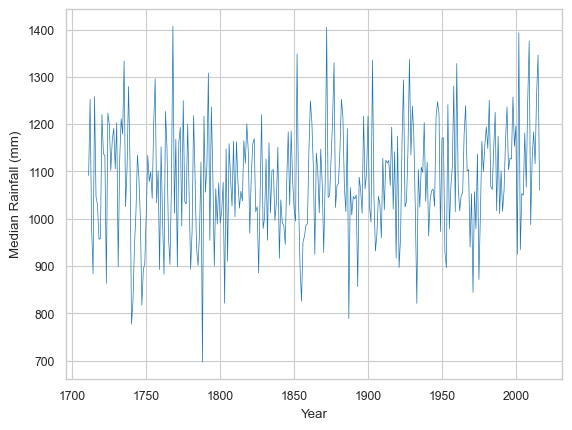

In [ ]:
raindfread = pd.read_csv("yearlyrain.csv")

sns.set_context("paper", rc={"lines.linewidth": 0.5, "figure.figsize":(10, 22)})
plot = sns.lineplot(data=raindfread, x="Year", y="Total Median")
plot.set_xlabel("Year")
plot.set_ylabel("Median Rainfall (mm)")

##### Yearly Temperatures



---


<a id="02i">

## Analysis

</a>

### Trends


### Relationships



---

<a id="03i">

## Predictions

</a>

### Synthetic Data


### Comparisons with Published Climate Models

In [ ]:
#SECTION 3 - PYTHON CELL



---

<a id="04i">

## Further Comments

</a>



In [ ]:
#SECTION 4 - PYTHON CELL



---

<a id="05i">

## Plots

</a>



In [ ]:
#SECTION 5 - PYTHON CELL



---

<a id="07i">

## REFERENCES

</a>


---